## Group Members
Mamta Kumari(B21CI025)​

1.  Mamta Kumari(B21CI025)
2. Manoj Solara(B21CI027)​
2.   Ruchit Kochar(B21CI038)
3.   Jason Daneil(B21CI019)
4. Ankit Kumar(B21CI006)

# Question 2
The storage house shown below facilitates the storage of various packed shipments. It can
accommodate shipments of different sizes with a maximum permissible weight of an individual
shipment as 20 kN. A Gantry mechanism has been proposed for efficient lifting and placing of
shipments. The beam, which is grey, traversesin the z-direction and the hook attached to it traverses
along the x-direction. In the context of the present problem, assume vertical static loading of the
weights.
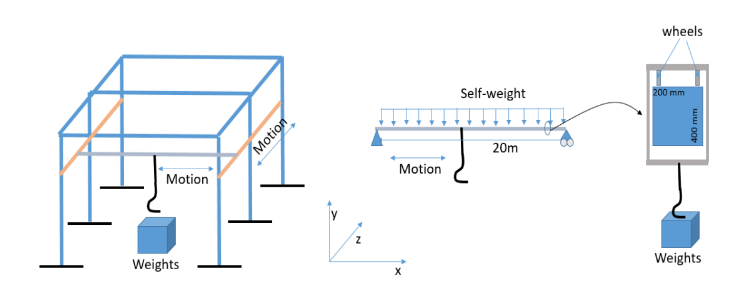

However, ready-made beams are not available in the vicinity of the storage house. The beam (grey
colour) needs to be fabricated with the help of sheet form of materials available in the local
workshop. The general material catalogue of the local workshop is shown in Annexure-1, and the
thickness of each material sheet is fixed to be 40 mm, which implies that the beam will be composed
of 10 material sheets of dimensions (20×0.2×0.04m). Given the constraints, execute the following
tasks (6m).

## Question 2a
Develop a tool (excel/programming) that takes the material sheets and their location(placement/layer orientation) as input and computes each layer's bending stress distribution. The
aforementioned computations have to be performed for critical zones of bending moment. In the
case of bending stress, check whether the stresses are within the yield stress limits (4 m).
Note: The toolkit has to be verified with results of homogenous orientation (same material sheets
for all ten layers)



In [ ]:
from pandas import read_csv
import matplotlib.pyplot as plt
import pandas as pd
x = read_csv("MOS Data.csv")
z = x.sample(n=10)
z_sample = x.sample(n=10)
x

,Material \nID,Elastic modulus \n(GPa),Yield strength \n(MPa),Density \n(kg/m3),Price (INR/m2 of sheet)
0,1,27,5,500,50
1,2,29,6,520,55
2,3,31,6,550,60
3,4,33,7,400,65
4,5,35,7,650,70
5,6,37,8,660,75
6,7,39,8,670,80
7,8,41,9,680,85
8,9,43,9,690,90
9,10,45,10,686,95


## Tool Kit

In [ ]:
class Bending_Distribution:
    def __init__(self, Data):
        self.Data = Data
    def modulus_ratio(self):
      n = list(self.Data.iloc[:,1])
      f = n[0]
      self.x = []
      for i in n:
          self.x.append(i/f)
      self.Data["Modulus Ratio (N)"] = self.x
    def Neutral_Axis(self):
      self.h = [0.04]*10
      self.Data["Height(H)"] = self.h
      self.b = [0.2] * 10
      self.Data["Breadth"] = self.b

      self.eq = [self.x[i]*0.2 for i in range(10)]
      self.Data["Equivalent Breadth(B)"] = self.eq

      self.eqar = [self.eq[i]*0.04 for i in range(10)]
      self.Data["Equivalent Area"] = self.eqar

      self.y = [ 0.38 - 0.04*i for i in range(10)]
      self.Data["y"] = self.y

      yar = [ self.eqar[i] * self.y[i] for i in range(10)]
      sum_yar = sum(yar)
      sum_ar = sum(self.eqar)
      self.yc = sum_yar/sum_ar
      return self.yc
    def Total_Weight(self):
      length = [20] * 10
      self.Data["Length"] = length

      volume = [self.h[i] * self.b[i] * length[i] for i in range(10)]
      density = list(self.Data.iloc[:,3])
      weight = [density[i] * volume[i] * 9.81 for i in range(10)]
      self.Data["Weight"] = weight
      self.total_weight = sum(weight)
      return self.total_weight
    def momemt_of_inertia(self):
      self.yi = [self.y[i]-self.yc for i in range(10)]
      self.Data["yi"] = self.yi
      self.I = [self.eq[i]*pow(0.04,3)/12 + self.eqar[i]*pow(self.yi[i],2) for i in range(10)]
      self.Data["I"] = self.I
    def Bending_Moment(self):
      P = 20000
      self.BM = (self.total_weight*20/8) + (P*20/4)
      return self.BM
    def stress(self):
      self.ycr1 = [(self.yi[i]-0.02) for i in range(10)] # Lower Layer
      self.ycr2 = [(self.yi[i]+0.02) for i in range(10)] # Upper Layer
      self.ycrm = [self.yi[i] for i in range(10)] # Upper Layer
      self.Data["Ycr1"] = self.ycr1
      self.Data["Ycr2"] = self.ycr2
      self.Data["Ycr_Middle_Layer"] = self.ycrm
      self.sigmacr1 = [self.BM * self.ycr1[i] / sum(self.I) for i in range(10)]
      self.Data["sigmacr1"] = self.sigmacr1
      self.sigmacr2 = [self.BM * self.ycr2[i] / sum(self.I) for i in range(10)]
      self.Data["sigmacr2"] = self.sigmacr2
      self.sigma_middle = [self.BM * self.ycrm[i] / sum(self.I) for i in range(10)]
      self.Data["sigma_middle"] = self.sigma_middle
      self.n_equivalent_lower = [self.sigmacr1[i]*self.x[i] for i in range(10)]
      self.Data["Lower_Layer_Equivalent_Stress "] = self.n_equivalent_lower

      self.n_equivalent_upper = [self.sigmacr2[i]*self.x[i] for i in range(10)]
      self.Data["Upper_Layer_Equivalent_Stress "] = self.n_equivalent_upper

      self.n_equivalent_middle = [self.sigma_middle[i]*self.x[i] for i in range(10)]
      self.Data["Middle_Layer_Equivalent_Stress "] = self.n_equivalent_middle
      y_ = list(self.Data.iloc[:,2])
      y1 = [i*(pow(10,6)) for i in y_]
      self.ratio_lower = [self.n_equivalent_lower[i]/y1[i] for i in range(10)]
      self.Data["Ratio_lower"] = self.ratio_lower
      self.ratio_upper = [self.n_equivalent_upper[i]/y1[i] for i in range(10)]
      self.Data["Ratio2_upper"] = self.ratio_upper
      self.ratio_middle = [self.n_equivalent_middle[i]/y1[i] for i in range(10)]
      self.Data["Ratio2_middle"] = self.ratio_middle
    def Plot_Graph(self):
      import matplotlib.pyplot as plt
      # Plot 1
      y_ = list(self.Data.iloc[:,2])
      y11 = [i*(pow(10,6)) for i in y_]
      y12 = [abs(i) for i in self.n_equivalent_lower]
      y13 = [abs(i) for i in self.n_equivalent_upper]
      x = range(1, len(y11) + 1)

      fig, ax = plt.subplots(1, 2, figsize=(12, 6))

      ax[0].plot(x, y11, 'b-', label='Yield strength', marker='o')
      ax[0].plot(x, y12, 'r-.', label='Lower_Layer_Stress', marker='o')
      ax[0].plot(x, y13, 'g-.', label='Upper_Layer_Stress', marker='d')
      ax[0].legend()
      ax[0].set_xlabel('Index')
      ax[0].set_ylabel('Stress')
      ax[0].set_title('Comparison of Yield strength and Stress')
      ax[0].grid(True)

      # Plot 2
      y21 = [(i) for i in self.ratio_lower]
      y22 = [(i) for i in self.ratio_upper]
      x = range(1, len(y21) + 1)

      ax[1].plot(x, y21, 'b-', label='ratio_lower_Layer', marker='o')
      ax[1].plot(x, y22, 'g-', label='ratio_upper_Layer', marker='o')
      ax[1].axhline(y=1, linestyle='--', color='#FF5733')  # add horizontal line at y=1
      ax[1].axhline(y=-1, linestyle='--', color='#FF5733') # add horizontal line at y=-1
      ax[1].legend()
      ax[1].set_xlabel('Index')
      ax[1].set_ylabel('Ratio')
      ax[1].set_title('Ratio plot')
      ax[1].grid(True)

      # Plot 3

      y_ = list(self.Data.iloc[:,2])
      y31 = [i*(pow(10,6)) for i in y_]
      y32 = [abs(i) for i in self.n_equivalent_lower]
      x = range(1, len(y31) + 1)

      fig, ax = plt.subplots(1, 2, figsize=(10, 6))

      ax[0].plot(x, y31, 'b-', label='Yield strength', marker='o')
      ax[0].plot(x, y32, 'r-.', label='Middle_Layer_Stress', marker='o')
      ax[0].legend()
      ax[0].set_xlabel('Index')
      ax[0].set_ylabel('Stress')
      ax[0].set_title('Comparison of Yield strength and Stress')
      ax[0].grid(True)

      # Plot 4
      y41 = [(i) for i in self.ratio_middle]
      x = range(1, len(y41) + 1)

      ax[1].plot(x, y41, 'b-', label='ratio_middle_Layer', marker='o')
      ax[1].axhline(y=1, linestyle='--', color='#FF5733')  # add horizontal line at y=1
      ax[1].axhline(y=-1, linestyle='--', color='#FF5733') # add horizontal line at y=-1
      ax[1].legend()
      ax[1].set_xlabel('Index')
      ax[1].set_ylabel('Ratio')
      ax[1].set_title('Ratio plot')
      ax[1].grid(True)

      # Display plot
      plt.tight_layout()
      plt.show()
    def Condition(self):
      for i in self.ratio_middle:
        if i<-1 or i>1:
          return 0
      return 1
    def total_price(self):
      print("Total Cost :- ",sum(self.Data.iloc[:,4]))
      
      
    def train(self,z,D):
      D.modulus_ratio()
      YC = D.Neutral_Axis()
      
      TW = D.Total_Weight()
      D.momemt_of_inertia()
      M = D.Bending_Moment()
      D.stress()
      print("NEUTRAL Axis : yc = ",YC,'\n',"Weight of Beam :",TW,'\n',"Moment :",self.BM,'\n',"Inertia :", sum(self.I))
      D.total_price()
      D.Plot_Graph()
      return self.Data
    def check(self,z,D):
      D.modulus_ratio()
      D.Neutral_Axis()
      D.Total_Weight()
      D.momemt_of_inertia()
      D.Bending_Moment()
      D.stress()
      x = D.Condition()
      if x == 1:
        s = list(self.Data.iloc[:,4])
        for i in range(10):
            m+= m[i]
        if m < min_price:
          min_price = m
          return self.Data
      else:
        return z_sample

##  Tool Kit Execution

NEUTRAL Axis : yc =  0.20384615384615384 
 Weight of Beam : 9274.7664 
 Moment : 123186.916 
 Inertia : 0.000846829760403531
Total Cost :-  995


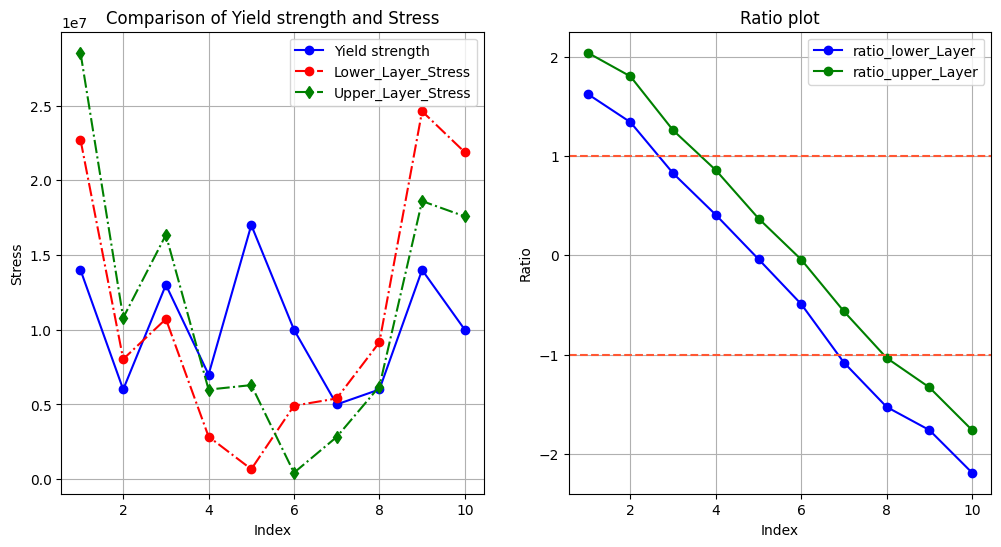

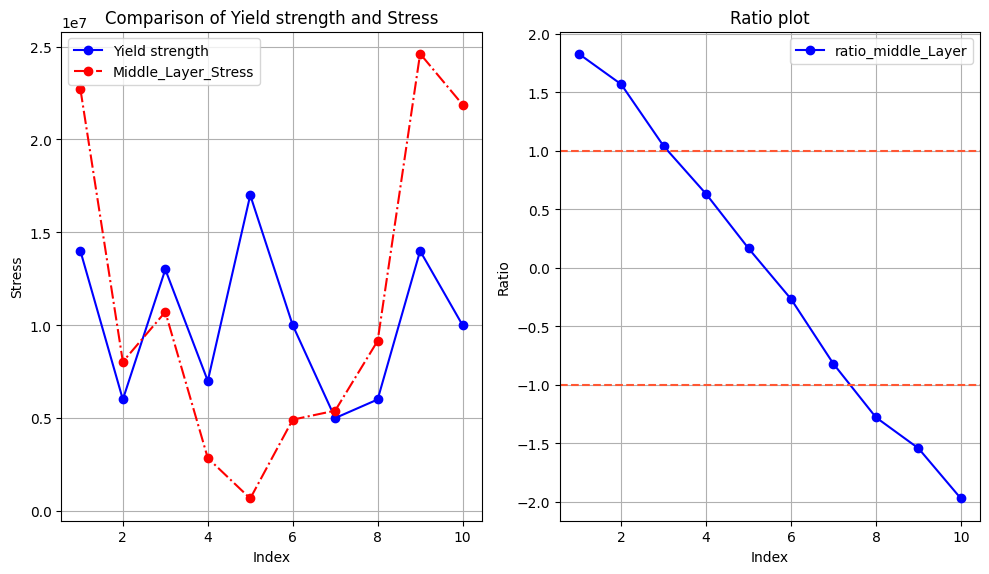

,Material \nID,Elastic modulus \n(GPa),Yield strength \n(MPa),Density \n(kg/m3),Price (INR/m2 of sheet),Modulus Ratio (N),Height(H),Breadth,Equivalent Breadth(B),Equivalent Area,...,Ycr_Middle_Layer,sigmacr1,sigmacr2,sigma_middle,Lower_Layer_Equivalent_Stress,Upper_Layer_Equivalent_Stress,Middle_Layer_Equivalent_Stress,Ratio_lower,Ratio2_upper,Ratio2_middle
17,18,61,14,654,135,1.000000,0.04,0.2,0.200000,0.008000,...,0.176154,2.271544e+07,2.853417e+07,2.562481e+07,2.271544e+07,2.853417e+07,2.562481e+07,1.622531,2.038155,1.830343
1,2,29,6,520,55,0.475410,0.04,0.2,0.095082,0.003803,...,0.136154,1.689671e+07,2.271544e+07,1.980607e+07,8.032861e+06,1.079914e+07,9.416002e+06,1.338810,1.799857,1.569334
16,17,59,13,658,130,0.967213,0.04,0.2,0.193443,0.007738,...,0.096154,1.107797e+07,1.689671e+07,1.398734e+07,1.071476e+07,1.634272e+07,1.352874e+07,0.824212,1.257132,1.040672
3,4,33,7,400,65,0.540984,0.04,0.2,0.108197,0.004328,...,0.056154,5.259240e+06,1.107797e+07,8.168607e+06,2.845163e+06,5.993002e+06,4.419082e+06,0.406452,0.856143,0.631297
23,24,73,17,612,165,1.196721,0.04,0.2,0.239344,0.009574,...,0.016154,-5.594936e+05,5.259240e+06,2.349873e+06,-6.695579e+05,6.293844e+06,2.812143e+06,-0.039386,0.370226,0.165420
10,11,47,10,682,100,0.770492,0.04,0.2,0.154098,0.006164,...,-0.023846,-6.378227e+06,-5.594936e+05,-3.468860e+06,-4.914372e+06,-4.310852e+05,-2.672728e+06,-0.491437,-0.043109,-0.267273
0,1,27,5,500,50,0.442623,0.04,0.2,0.088525,0.003541,...,-0.063846,-1.219696e+07,-6.378227e+06,-9.287594e+06,-5.398655e+06,-2.823150e+06,-4.110902e+06,-1.079731,-0.564630,-0.822180
2,3,31,6,550,60,0.508197,0.04,0.2,0.101639,0.004066,...,-0.103846,-1.801569e+07,-1.219696e+07,-1.510633e+07,-9.155517e+06,-6.198455e+06,-7.676986e+06,-1.525919,-1.033076,-1.279498
18,19,63,14,647,140,1.032787,0.04,0.2,0.206557,0.008262,...,-0.143846,-2.383443e+07,-1.801569e+07,-2.092506e+07,-2.461588e+07,-1.860637e+07,-2.161113e+07,-1.758277,-1.329027,-1.543652
9,10,45,10,686,95,0.737705,0.04,0.2,0.147541,0.005902,...,-0.183846,-2.965316e+07,-2.383443e+07,-2.674379e+07,-2.187528e+07,-1.758277e+07,-1.972903e+07,-2.187528,-1.758277,-1.972903


In [ ]:
D = Bending_Distribution(z)
z_sample = D.train(z,D)
z_sample

NEUTRAL Axis : yc =  0.19999999999999996 
 Weight of Beam : 7848.000000000001 
 Moment : 119620.0 
 Inertia : 0.0010666666666666667
Total Cost :-  500


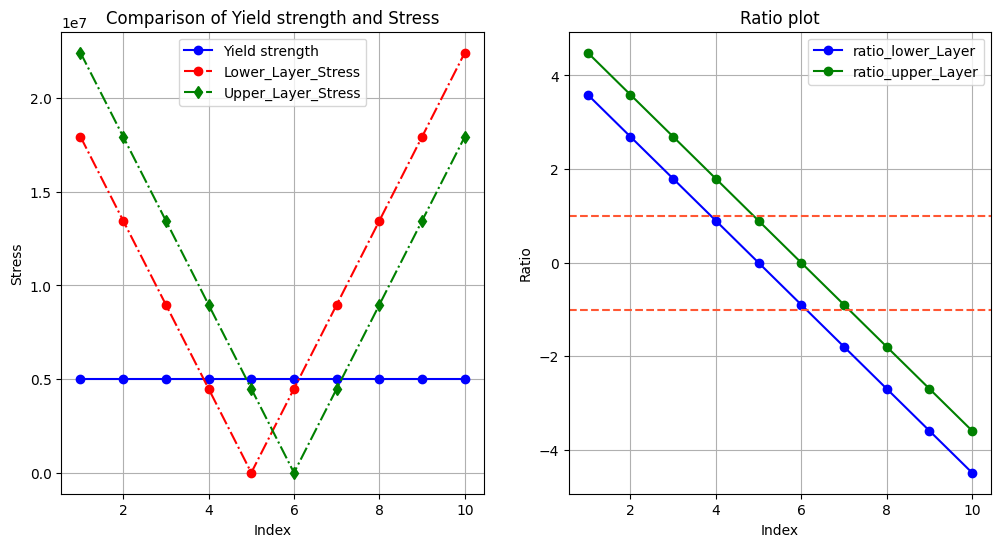

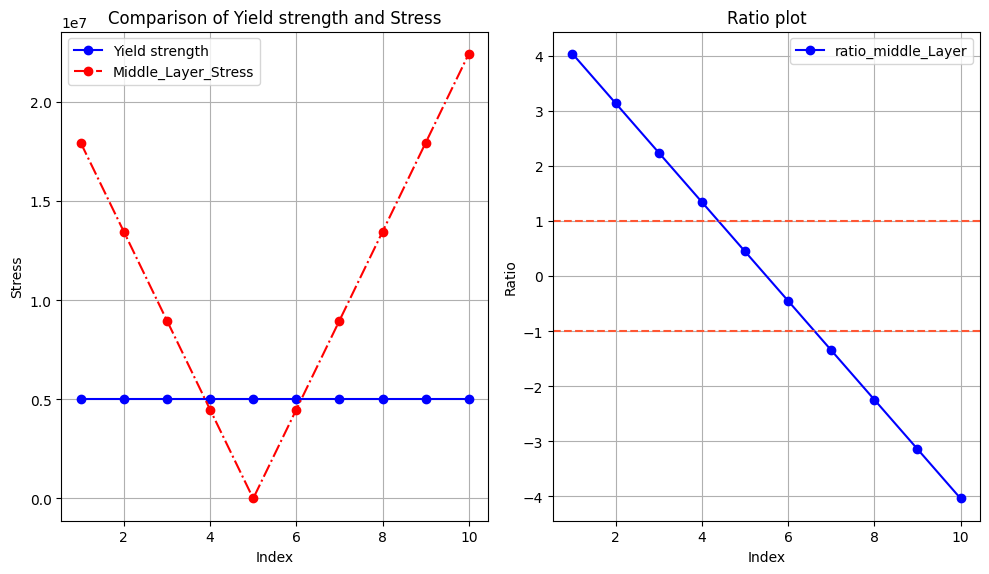

In [ ]:
df = pd.read_csv('/content/MOS Data.csv')
df.columns = df.columns.str.strip()
df_sorted = df.sort_values(by='Price (INR/m2  of sheet)')
df_subset = pd.concat([
    df_sorted.iloc[0:1],df_sorted.iloc[0:1],df_sorted.iloc[0:1],
    df_sorted.iloc[0:1],df_sorted.iloc[0:1],df_sorted.iloc[0:1],
    df_sorted.iloc[0:1],df_sorted.iloc[0:1],df_sorted.iloc[0:1],
    df_sorted.iloc[0:1]])
D = Bending_Distribution(df_subset)
z_sample = D.train(df_subset,D)

# Question 2b

NEUTRAL Axis : yc =  0.18166666666666667 
 Weight of Beam : 9427.0176 
 Moment : 123567.544 
 Inertia : 0.0013863703703703707
Total Cost :-  725


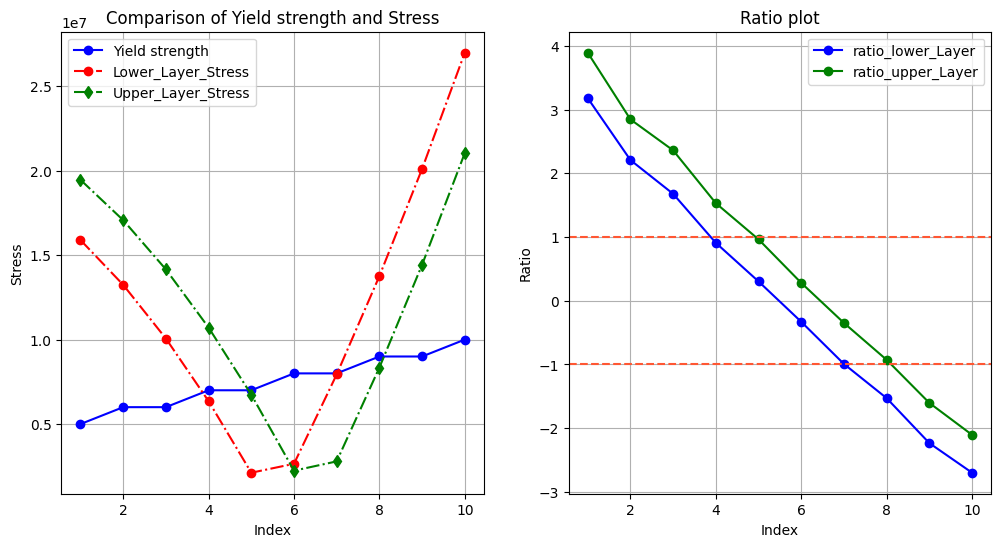

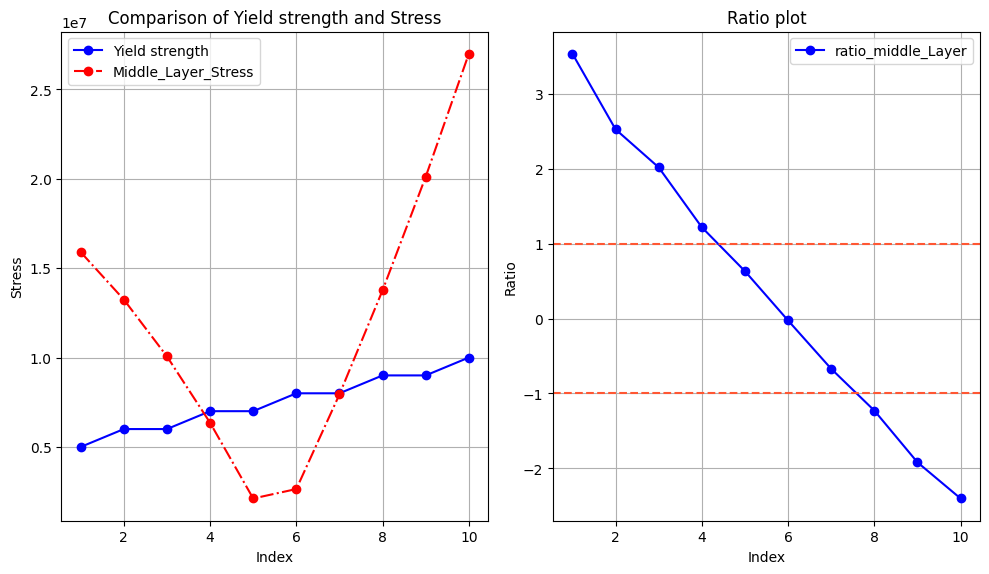

In [ ]:
df = pd.read_csv('/content/MOS Data.csv')
df.columns = df.columns.str.strip()
df_sorted = df.sort_values(by='Price (INR/m2  of sheet)')
df_subset = pd.concat([
    df_sorted.iloc[0:10]])
D = Bending_Distribution(df_subset)
z_sample = D.train(df_subset,D)

In [ ]:
z_sample

,Material \nID,Elastic modulus \n(GPa),Yield strength \n(MPa),Density \n(kg/m3),Price (INR/m2 of sheet),Modulus Ratio (N),Height(H),Breadth,Equivalent Breadth(B),Equivalent Area,...,Ycr_Middle_Layer,sigmacr1,sigmacr2,sigma_middle,Lower_Layer_Equivalent_Stress,Upper_Layer_Equivalent_Stress,Middle_Layer_Equivalent_Stress,Ratio_lower,Ratio2_upper,Ratio2_middle
0,1,27,5,500,50,1.000000,0.04,0.2,0.200000,0.008000,...,0.198333,1.589490e+07,1.946011e+07,1.767750e+07,1.589490e+07,1.946011e+07,1.767750e+07,3.178979,3.892021,3.535500
1,2,29,6,520,55,1.074074,0.04,0.2,0.214815,0.008593,...,0.158333,1.232969e+07,1.589490e+07,1.411229e+07,1.324300e+07,1.707230e+07,1.515765e+07,2.207166,2.845383,2.526274
2,3,31,6,550,60,1.148148,0.04,0.2,0.229630,0.009185,...,0.118333,8.764475e+06,1.232969e+07,1.054708e+07,1.006292e+07,1.415631e+07,1.210961e+07,1.677153,2.359384,2.018268
3,4,33,7,400,65,1.222222,0.04,0.2,0.244444,0.009778,...,0.078333,5.199265e+06,8.764475e+06,6.981870e+06,6.354657e+06,1.071214e+07,8.533397e+06,0.907808,1.530305,1.219057
4,5,35,7,650,70,1.296296,0.04,0.2,0.259259,0.010370,...,0.038333,1.634055e+06,5.199265e+06,3.416660e+06,2.118219e+06,6.739788e+06,4.429003e+06,0.302603,0.962827,0.632715
5,6,37,8,660,75,1.370370,0.04,0.2,0.274074,0.010963,...,-0.001667,-1.931156e+06,1.634055e+06,-1.485504e+05,-2.646398e+06,2.239260e+06,-2.035691e+05,-0.330800,0.279908,-0.025446
6,7,39,8,670,80,1.444444,0.04,0.2,0.288889,0.011556,...,-0.041667,-5.496366e+06,-1.931156e+06,-3.713761e+06,-7.939195e+06,-2.789447e+06,-5.364321e+06,-0.992399,-0.348681,-0.670540
7,8,41,9,680,85,1.518519,0.04,0.2,0.303704,0.012148,...,-0.081667,-9.061576e+06,-5.496366e+06,-7.278971e+06,-1.376017e+07,-8.346333e+06,-1.105325e+07,-1.528908,-0.927370,-1.228139
8,9,43,9,690,90,1.592593,0.04,0.2,0.318519,0.012741,...,-0.121667,-1.262679e+07,-9.061576e+06,-1.084418e+07,-2.010933e+07,-1.443140e+07,-1.727036e+07,-2.234370,-1.603489,-1.918929
9,10,45,10,686,95,1.666667,0.04,0.2,0.333333,0.013333,...,-0.161667,-1.619200e+07,-1.262679e+07,-1.440939e+07,-2.698666e+07,-2.104464e+07,-2.401565e+07,-2.698666,-2.104464,-2.401565


#### Combination 1

NEUTRAL Axis : yc =  0.20313479623824449 
 Weight of Beam : 9957.542399999998 
 Moment : 124893.856 
 Inertia : 0.0009542397246296637
Total Cost :-  1420


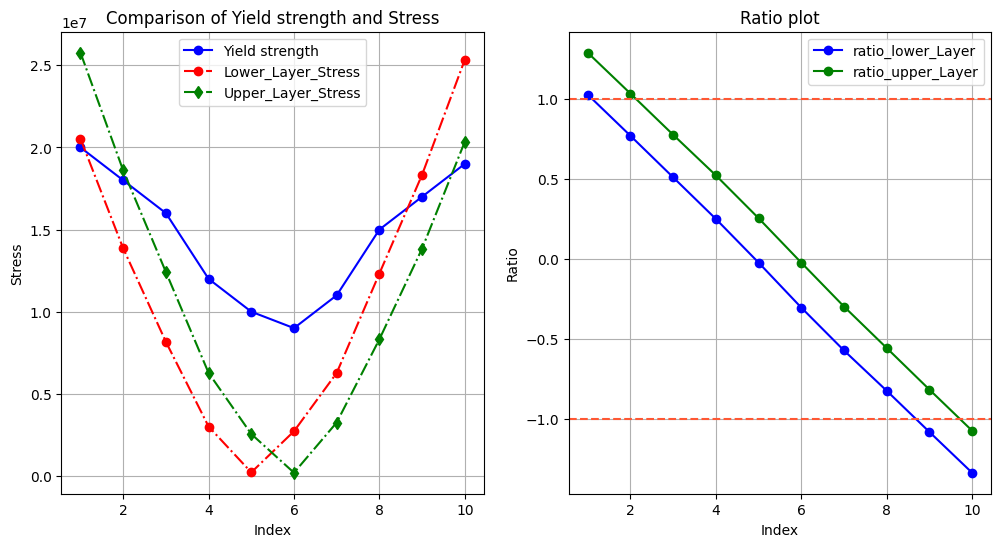

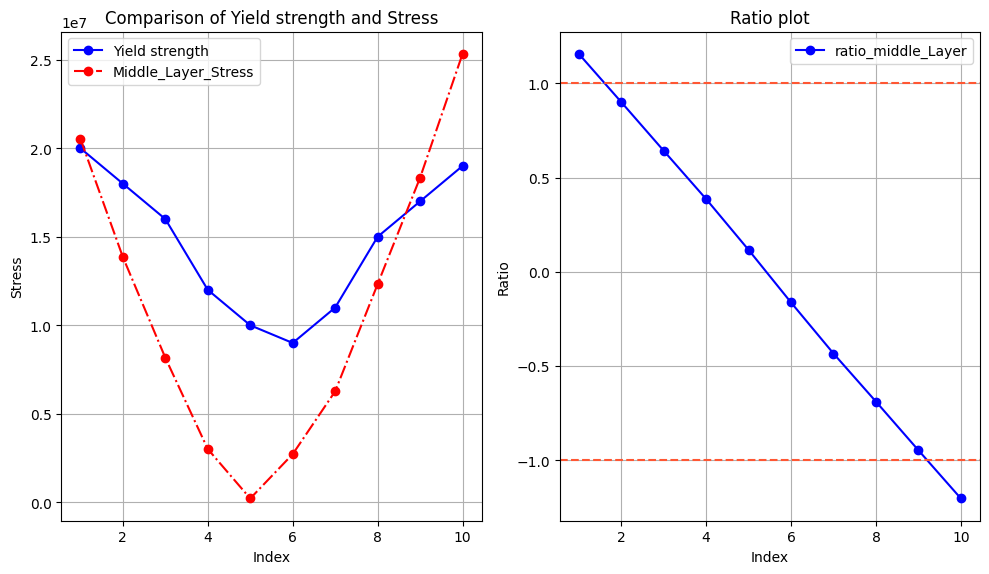

In [ ]:
df = pd.read_csv('/content/MOS Data.csv')
df.columns = df.columns.str.strip()
df_sorted = df.sort_values(by='Price (INR/m2  of sheet)')
df_subset = pd.concat([
    df_sorted.iloc[29:30],
    df_sorted.iloc[25:26],
    df_sorted.iloc[21:22],
    df_sorted.iloc[13:14],
    df_sorted.iloc[9:10],
    df_sorted.iloc[7:8],
    df_sorted.iloc[11:12],
    df_sorted.iloc[19:20],
    df_sorted.iloc[23:24],
    df_sorted.iloc[27:28]
    ])
D = Bending_Distribution(df_subset)
z_sample = D.train(df_subset,D)

#### Combination 2

NEUTRAL Axis : yc =  0.20358422939068097 
 Weight of Beam : 9722.1024 
 Moment : 124305.256 
 Inertia : 0.000887494733291166
Total Cost :-  1220


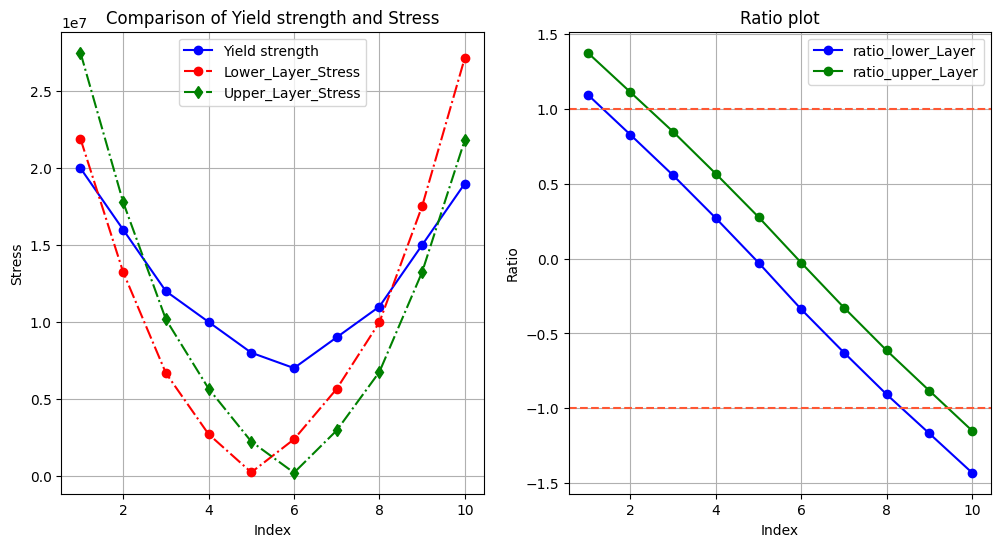

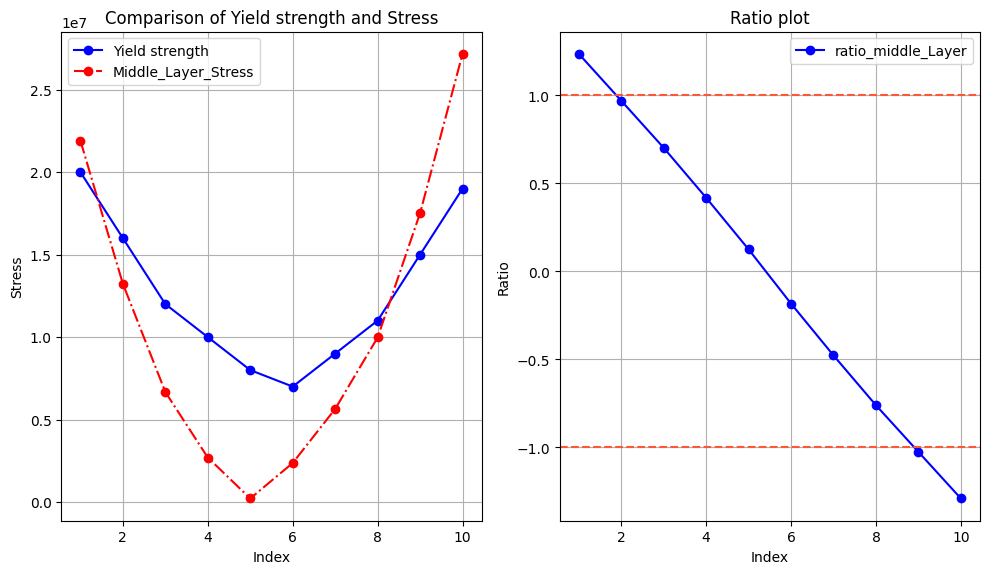

In [ ]:
df = pd.read_csv('/content/MOS Data.csv')
df.columns = df.columns.str.strip()
df_sorted = df.sort_values(by='Price (INR/m2  of sheet)')
df_subset = pd.concat([
    df_sorted.iloc[29:30],
    df_sorted.iloc[21:22],
    df_sorted.iloc[13:14],
    df_sorted.iloc[9:10],
    df_sorted.iloc[5:6],
    df_sorted.iloc[3:4],
    df_sorted.iloc[7:8],
    df_sorted.iloc[11:12],
    df_sorted.iloc[19:20],
    df_sorted.iloc[27:28]
    ])
D = Bending_Distribution(df_subset)
z_sample = D.train(df_subset,D)